# DataViz Project 1

The dataset contains weekly retail prices of three grades of gasoline, diesel, auto propane and compressed natural gas in 10 Ontario markets. It is downloaded from https://data.ontario.ca/dataset/fuels-price-survey-information. Plotting the visualization using the dataset data to answer/corresponding the following questions. 



In [1]:
#iamfaiq

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/fueltypesall.csv')
#df

## Question 1

Compare the mean Regular Unleaded Gasoline price among different cities in 2019. Plot the corresponding bar chart.

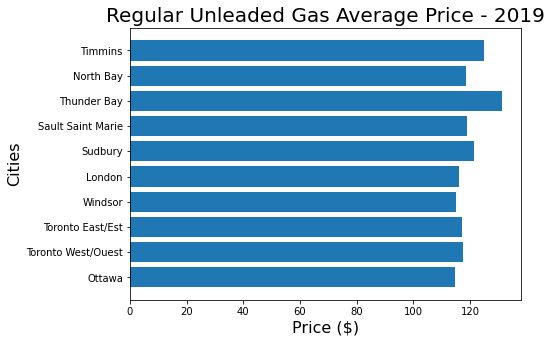

In [5]:
# Assuming Cities don't include Ontario Average, nor Souther/Northern Average columns

dfDate = df.copy()
dfDate['Date'] = pd.to_datetime(dfDate['Date'], format='%Y-%m-%d')

#Filtering the df with the conditions for the type and year
dfDate = dfDate[(dfDate['Fuel Type'] == 'Regular Unleaded Gasoline') & (dfDate.Date >= '2019') & (dfDate.Date < '2020')] # finally works
#getting the cities columns
dfDate = dfDate[['Ottawa','Toronto West/Ouest', 'Toronto East/Est','Windsor','London','Sudbury','Sault Saint Marie', 'Thunder Bay', 'North Bay', 'Timmins']]
dfDate = dfDate.mean() # axis = 0, is default so don't have to put in (); and it returns mean of each column

dfDate = dfDate.to_frame().T # turning the dfDate from series to a dataframe

xlabVal = []
ylabVal = []

for col in dfDate.columns:
    xlabVal.append(col)

ylabVal = dfDate.values # returns a 2D array with values being in first element only

d = {'Cities': xlabVal, 
     'Price': ylabVal[0]
    }
q1df = pd.DataFrame(data=d)

fig, ax = plt.subplots(figsize=(7,5))
plt.barh(q1df["Cities"],q1df["Price"])

plt.xlabel("Price ($)",fontsize=16)
plt.ylabel("Cities",fontsize=16)
plt.title("Regular Unleaded Gas Average Price - 2019", fontsize=20)
plt.show()


## Question 2

Plot the density distribution (with Gaussian kernel) of the Regular Unleaded Gasoline price in Ottawa for 2019. Choose the appropriate parameters.

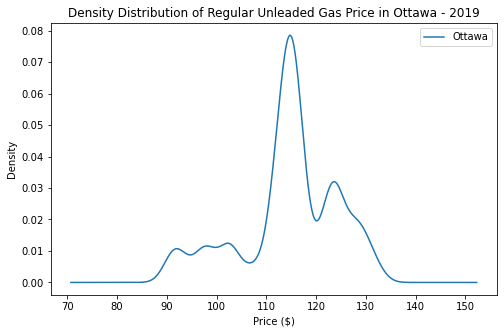

In [3]:

q2df = df.copy()
q2df = q2df[(q2df['Fuel Type'] == 'Regular Unleaded Gasoline') & (q2df.Date >= '2019') & (q2df.Date < '2020')]
q2df = q2df[['Ottawa']] # second bracket brings the label of Ottawa on top without it, the data gets printed
#q2df

p = q2df.plot.kde(bw_method = 0.205, figsize=(8, 5), 
                  title="Density Distribution of Regular Unleaded Gas Price in Ottawa - 2019")

plt.xlabel("Price ($)")

plt.show()

## Question 3
Plot the boxplot for the Regular Unleaded Gasoline price in Ottawa across year 2012-2019. The distribution of each year should be visualized seperately.

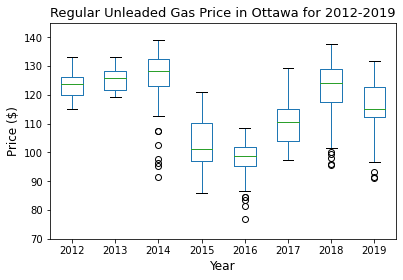

In [4]:

q3df = df.copy()
q3df = q3df[(q3df['Fuel Type'] == 'Regular Unleaded Gasoline') & (q3df.Date >= '2012') & (q3df.Date < '2020')]
q3df = q3df[['Date','Ottawa']]

q3df['Date'] = pd.to_datetime(q3df['Date'], format='%Y-%m-%d') # turning Date from str to datetime objects
q3df['Year'] = q3df['Date'].dt.year # gets the year value from the date column and makes another column with just the year of date

g = q3df.groupby('Year')
#g.first() # gets the first entry from each year
#g.boxplot(by='Year', column=['Ottawa'], grid=False) # plots them in different plot box

#plot
q3df.boxplot(column=['Ottawa'], by=['Year'], grid = False)
plt.ylim(70, 145)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Price ($)",fontsize=12)
plt.title("Regular Unleaded Gas Price in Ottawa for 2012-2019", fontsize=13)
plt.suptitle('') # to get rid of the default title
plt.show()